In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c34ddd8ec0dfea1c6836a01c627e5e25


In [3]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs



In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

54.88500668117419 -0.5624720161125083
41.30499075799574 63.90603247250448
-44.488139541830634 120.20996135490338
53.97803527125561 -144.11666843748316
82.94879226622487 -37.164725139168894
1.49740017757793 2.354685477367866
-8.109289972871196 108.29551839073207
-35.456390566868215 -31.861742266035975
60.101755489092824 57.237301319033065
-6.12307536967667 144.11794035734215
25.20630835507562 -26.075794752894183
-2.8796267912841245 -6.860747777632099
-23.804264099796427 123.63606124294739
-59.35443336221872 134.15141361168855
26.77263245064215 163.95304520592498
-88.83821965551326 177.29970141036114
25.014761205367307 -165.1711493875775
3.1085669551658555 -33.855484967173425
8.116276154851818 -145.98105748967572
-66.51951753824851 173.86853981036035
-32.78796770818121 -62.40290232404726
-88.60748485232531 -15.84765952307194
43.09554739974757 43.359931753623414
37.621643260958336 -84.84577704296002
-63.537470564503735 116.80286537951383
47.011415030272985 -122.36562928028304
51.798397666

In [7]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [8]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

613

In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | redcar
Processing Record 2 of Set 1 | gazli
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | palmer
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | anloga
Processing Record 7 of Set 1 | kawalu
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | krasnovishersk
Processing Record 10 of Set 1 | ialibu
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | caucaia
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | bell ville
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 o

Processing Record 38 of Set 4 | strezhevoy
Processing Record 39 of Set 4 | deloraine
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | kargasok
Processing Record 42 of Set 4 | aljezur
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 46 of Set 4 | spas-demensk
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | kachikau
City not found. Skipping...
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | ambulu
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | santa maria
Processing Record 6 of Set 5 | vermilion
Processing Record 7 of Set 5 | 

Processing Record 24 of Set 8 | asifabad
Processing Record 25 of Set 8 | churu
Processing Record 26 of Set 8 | pohrebyshche
Processing Record 27 of Set 8 | edd
Processing Record 28 of Set 8 | gorontalo
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | tual
Processing Record 31 of Set 8 | masallatah
Processing Record 32 of Set 8 | rabaul
Processing Record 33 of Set 8 | betanzos
Processing Record 34 of Set 8 | ostersund
Processing Record 35 of Set 8 | kuruksay
City not found. Skipping...
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | kokoda
Processing Record 38 of Set 8 | turukhansk
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | manono
Processing Record 41 of Set 8 | coos bay
Processing Record 42 of Set 8 | sidi ali
Processing Record 43 of Set 8 | donskoye
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | ijaki
City not found. Skipping...
Processing Record 46 of Set 8 | broken hill
Proces

Processing Record 11 of Set 12 | usak
Processing Record 12 of Set 12 | alofi
Processing Record 13 of Set 12 | laguna
Processing Record 14 of Set 12 | farafangana
Processing Record 15 of Set 12 | meyungs
City not found. Skipping...
Processing Record 16 of Set 12 | pavlodolskaya
Processing Record 17 of Set 12 | mezen
Processing Record 18 of Set 12 | lobez
Processing Record 19 of Set 12 | ahome
Processing Record 20 of Set 12 | adrar
Processing Record 21 of Set 12 | chowchilla
Processing Record 22 of Set 12 | linfen
Processing Record 23 of Set 12 | khlung
Processing Record 24 of Set 12 | itamaraca
Processing Record 25 of Set 12 | wuwei
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | xianshuigu
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | mokhsogollokh
Processing Record 30 of Set 12 | sabha
Processing Record 31 of Set 12 | eyl
Processing Record 32 of Set 12 | sembakung
Processing Record 33 of Set 12 | senneterre
Processing Record 34 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Redcar,54.6166,-1.0600,52.09,66,100,7.00,GB,2023-01-04 18:57:04
1,Gazli,40.1333,63.4500,45.66,30,0,10.49,UZ,2023-01-04 18:57:05
2,Albany,42.6001,-73.9662,44.64,91,100,2.59,US,2023-01-04 18:55:00
3,Palmer,42.1584,-72.3287,54.00,92,100,1.72,US,2023-01-04 18:57:09
4,Tasiilaq,65.6145,-37.6368,-0.69,65,16,7.16,GL,2023-01-04 18:57:10
5,Anloga,5.7947,0.8973,80.17,67,42,10.83,GH,2023-01-04 18:57:10
6,Kawalu,-7.3817,108.2082,73.44,91,100,1.48,ID,2023-01-04 18:57:11
7,Arraial Do Cabo,-22.9661,-42.0278,91.26,52,40,9.22,BR,2023-01-04 18:57:15
8,Krasnovishersk,60.4078,57.0820,-2.02,98,100,3.87,RU,2023-01-04 18:57:16
9,Ialibu,-6.2821,143.9935,54.39,90,100,2.66,PG,2023-01-04 18:57:17


In [11]:
#reorganize columns to City, Country, Date Lat, Lng, max temp, humidity, cloudiness and wind speed

new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df= city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Redcar,GB,2023-01-04 18:57:04,54.6166,-1.0600,52.09,66,100,7.00
1,Gazli,UZ,2023-01-04 18:57:05,40.1333,63.4500,45.66,30,0,10.49
2,Albany,US,2023-01-04 18:55:00,42.6001,-73.9662,44.64,91,100,2.59
3,Palmer,US,2023-01-04 18:57:09,42.1584,-72.3287,54.00,92,100,1.72
4,Tasiilaq,GL,2023-01-04 18:57:10,65.6145,-37.6368,-0.69,65,16,7.16
...,...,...,...,...,...,...,...,...,...
550,Shingu,JP,2023-01-04 19:58:32,33.7333,135.9833,41.02,70,24,8.34
551,Cedar City,US,2023-01-04 19:55:52,37.6775,-113.0619,37.00,87,92,5.41
552,Zhicheng,CN,2023-01-04 19:58:32,30.2956,111.5047,50.38,54,100,3.18
553,Havre-Saint-Pierre,CA,2023-01-04 19:58:33,50.2334,-63.5986,21.20,45,0,14.97


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")


In [13]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

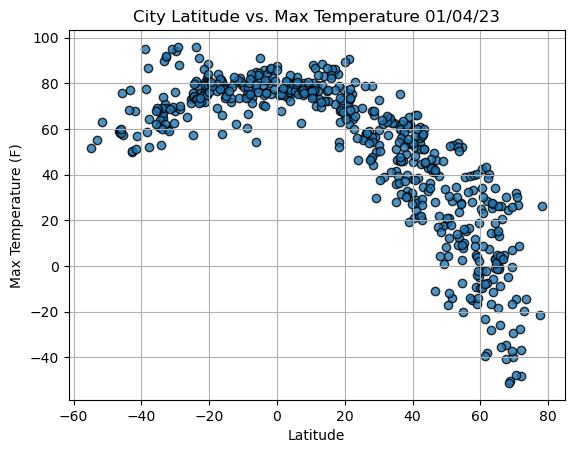

In [14]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

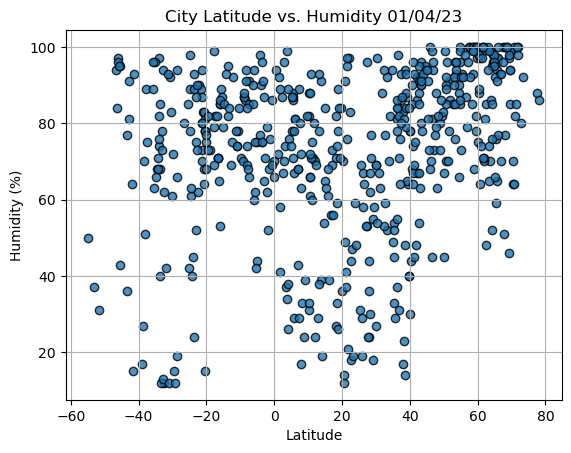

In [15]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

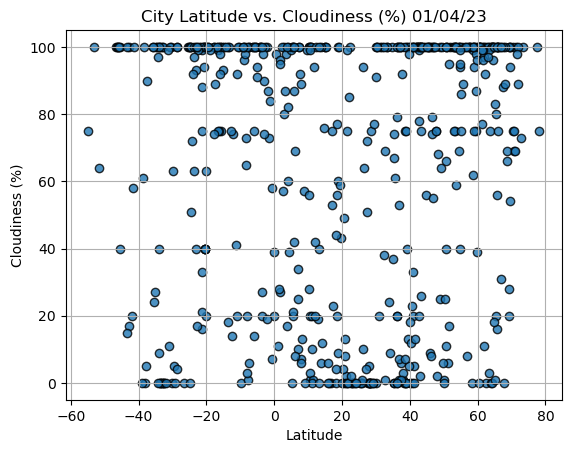

In [16]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

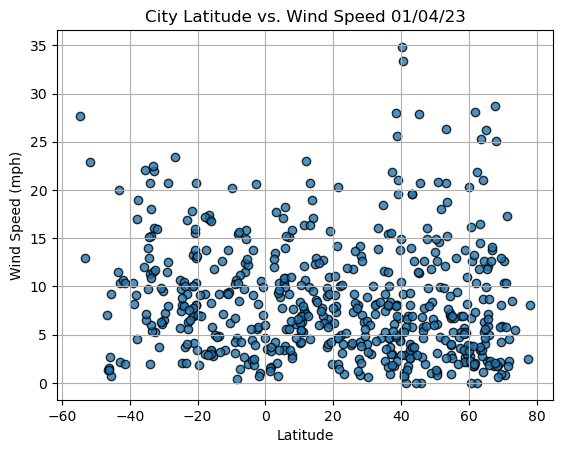

In [17]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [18]:
# Import linregress

from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data. Added way to show r_value with print function.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
        
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    print(f"The r_value is {r_value:.2f}")
    
    plt.show()
    

In [20]:
#use loc function to pull out specific row in our current DataFrame, in this case index 13

index13= city_data_df.loc[13]

index13


City                  New Norfolk
Country                        AU
Date          2023-01-04 18:57:22
Lat                      -42.7826
Lng                      147.0587
Max Temp                    49.91
Humidity                       81
Cloudiness                     17
Wind Speed                   2.15
Name: 13, dtype: object

In [21]:
# we can also filter DataFrame based on value of row.  Like get Northern hemisphere latitudes (positive equals those)

city_data_df["Lat"]>=0

0       True
1       True
2       True
3       True
4       True
       ...  
550     True
551     True
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [22]:
# if we want to get all data fitting the criteria over 0 we can use loc method

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Redcar,GB,2023-01-04 18:57:04,54.6166,-1.0600,52.09,66,100,7.00
1,Gazli,UZ,2023-01-04 18:57:05,40.1333,63.4500,45.66,30,0,10.49
2,Albany,US,2023-01-04 18:55:00,42.6001,-73.9662,44.64,91,100,2.59
3,Palmer,US,2023-01-04 18:57:09,42.1584,-72.3287,54.00,92,100,1.72
4,Tasiilaq,GL,2023-01-04 18:57:10,65.6145,-37.6368,-0.69,65,16,7.16


In [23]:
# create data frame for southeren hemisphere using same code as above but <0

city_data_df.loc[(city_data_df["Lat"] <= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Kawalu,ID,2023-01-04 18:57:11,-7.3817,108.2082,73.44,91,100,1.48
7,Arraial Do Cabo,BR,2023-01-04 18:57:15,-22.9661,-42.0278,91.26,52,40,9.22
9,Ialibu,PG,2023-01-04 18:57:17,-6.2821,143.9935,54.39,90,100,2.66
13,New Norfolk,AU,2023-01-04 18:57:22,-42.7826,147.0587,49.91,81,17,2.15
14,Bluff,NZ,2023-01-04 18:57:25,-46.6000,168.3333,58.96,94,100,7.09


In [24]:
# now that we figured that out, let's make a dataframe for both to use

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


The r_value is -0.86


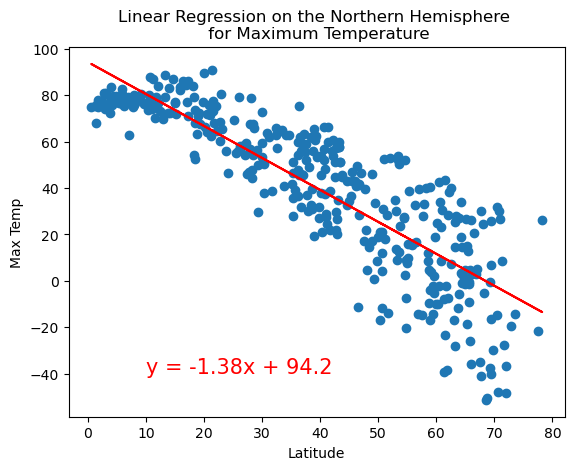

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'

# Call the function.

plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,-40))





                       

The r_value is 0.50


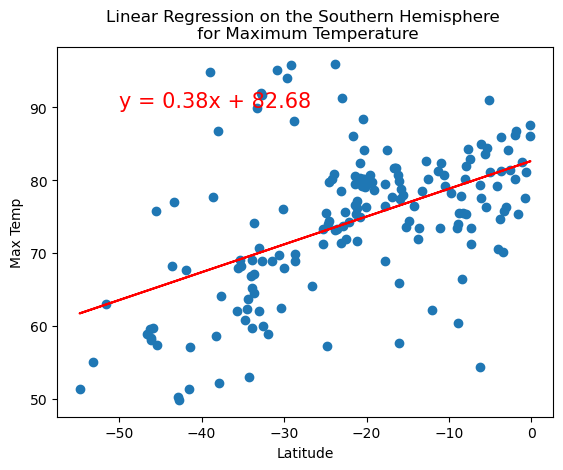

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'

# Call the function.

plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

The r_value is 0.44


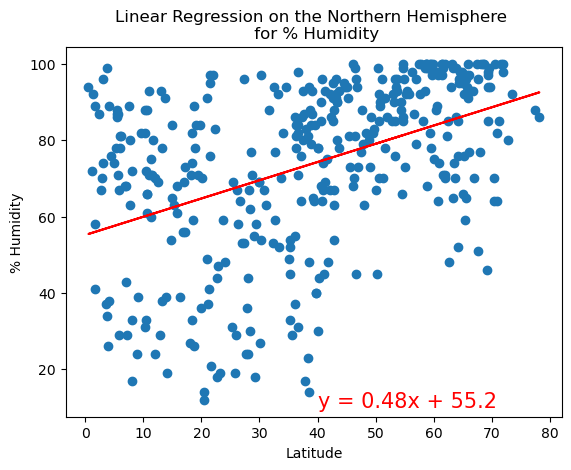

In [27]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

title =  'Linear Regression on the Northern Hemisphere \n for % Humidity'

# Call the function.

plot_linear_regression(x_values, y_values, title,  '% Humidity',(40,10))

The r_value is 0.22


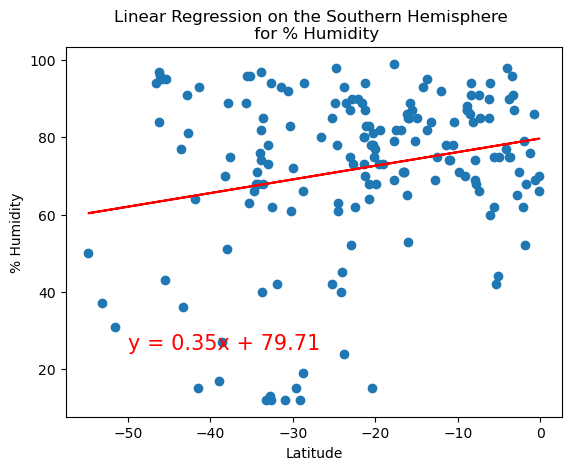

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

title = 'Linear Regression on the Southern Hemisphere \n for % Humidity'

# Call the function.

plot_linear_regression(x_values, y_values, title, '% Humidity', (-50, 25))

The r_value is 0.28


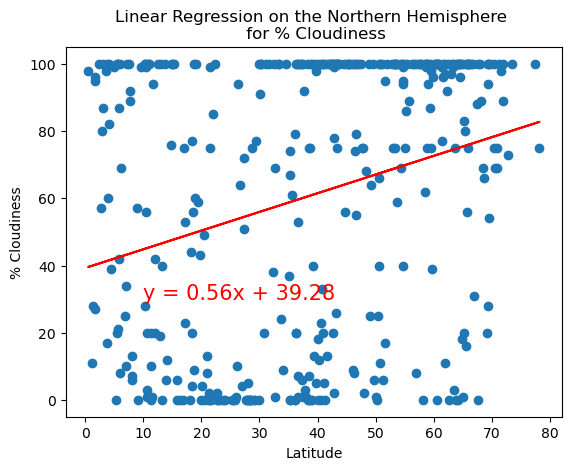

In [29]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

title = 'Linear Regression on the Northern Hemisphere \n for % Cloudiness'

# Call the function.

plot_linear_regression(x_values, y_values, title, '% Cloudiness', (10, 30))

The r_value is 0.11


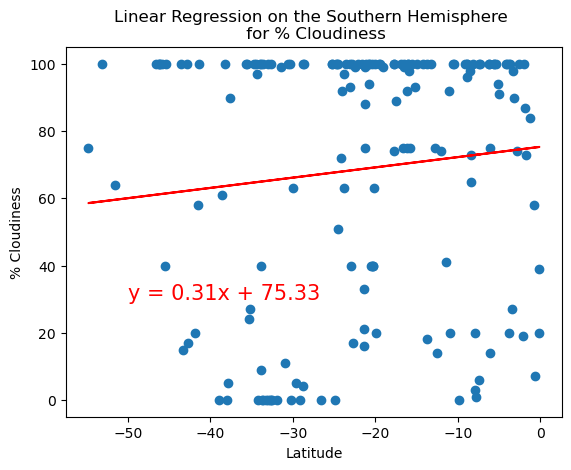

In [30]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

title = 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'

# Call the function.

plot_linear_regression(x_values, y_values, title, '% Cloudiness', (-50, 30))

The r_value is -0.02


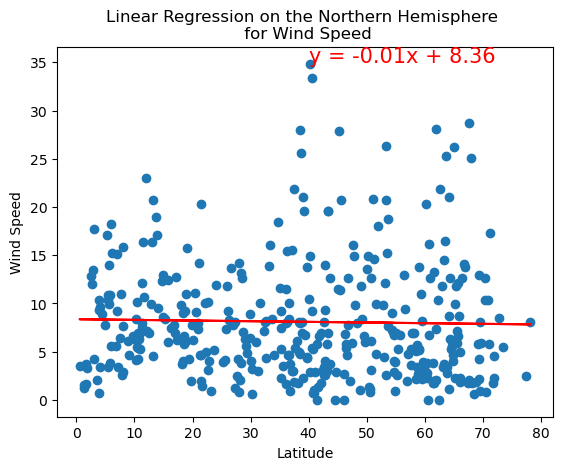

In [31]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

title =  'Linear Regression on the Northern Hemisphere \n for Wind Speed'

# Call the function.

plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,35))

The r_value is -0.20


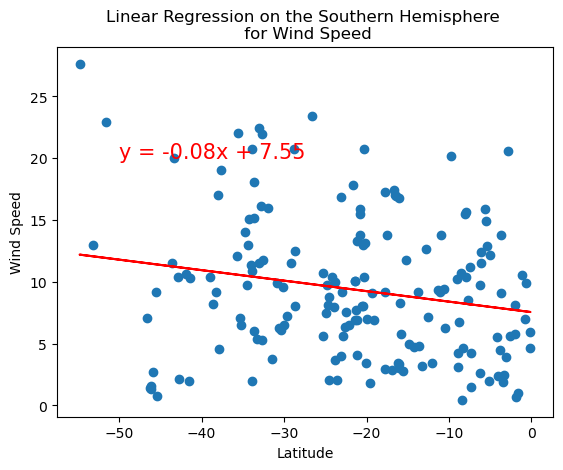

In [32]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

title =  'Linear Regression on the Southern Hemisphere \n for Wind Speed'

# Call the function.

plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-50,20))